# Data Exploration

In [3]:
import pandas as pd
import numpy as np

In [189]:
# Import the CSV file to df dataframe

df = pd.read_csv("Datasets/IrisDataset/Iris.csv")

In [119]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
df.shape

(150, 6)

In [12]:
# Find the number of missing values in the df

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
# Separate the numerical and categorical values

categorical = df.columns[df.dtypes == 'object']
numerical = df.columns[df.dtypes != 'object']

In [21]:
df[categorical[0]].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
for x in numerical:print(x,":",df[x].unique().min(),"-", df[x].unique().max())

Id : 1 - 150
SepalLengthCm : 4.3 - 7.9
SepalWidthCm : 2.0 - 4.4
PetalLengthCm : 1.0 - 6.9
PetalWidthCm : 0.1 - 2.5


In [37]:
mean = df[numerical[1:]].mean()

In [36]:
df[numerical[1:]].median()

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64

In [39]:
df[numerical[1:]].std()

SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64

# Data Visualization

In [103]:
import matplotlib.pyplot as plt

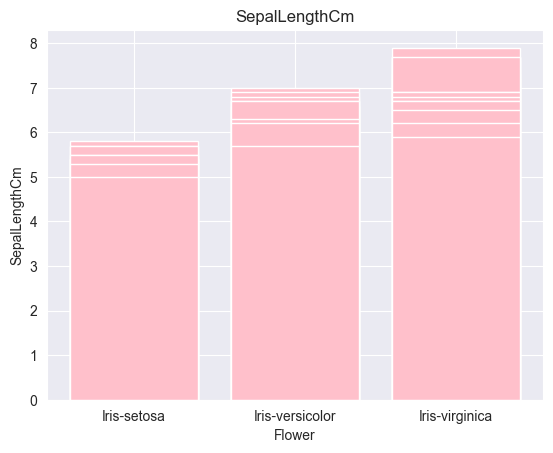

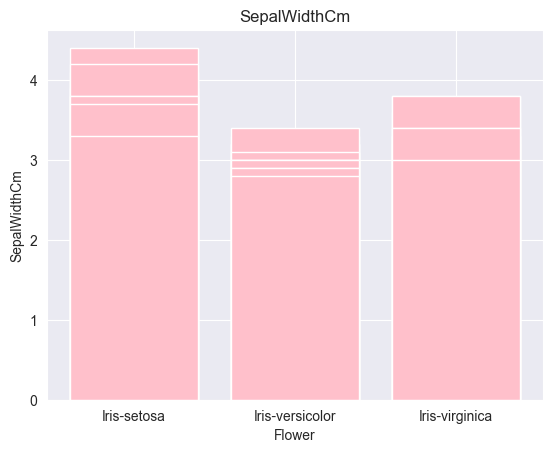

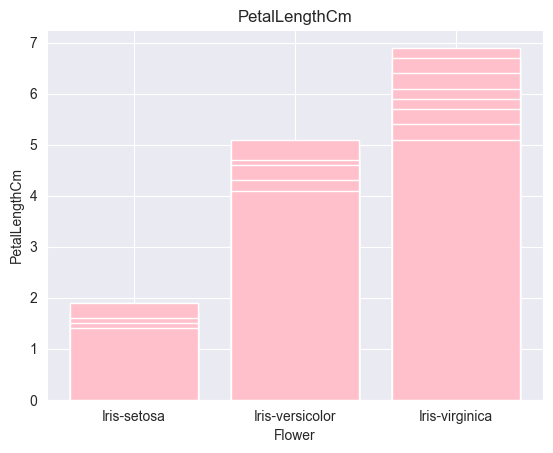

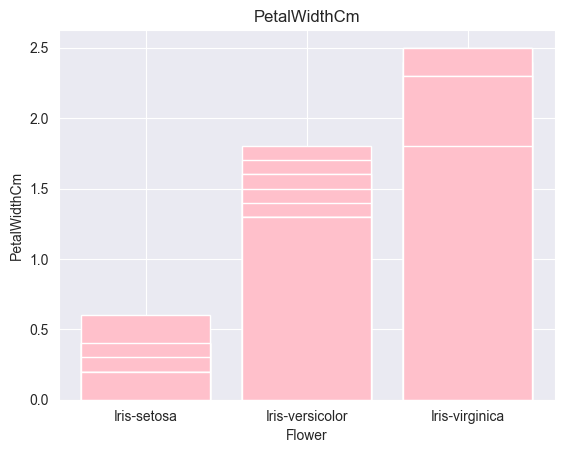

In [239]:
# Bar Graph
sns.set_style("darkgrid")

for i in range(1,len(numerical)): 
    plt.bar(df[categorical[0]],df[numerical[i]], color = "pink")
    plt.title(numerical[i])
    plt.ylabel(numerical[i])
    plt.xlabel("Flower")
    plt.show()

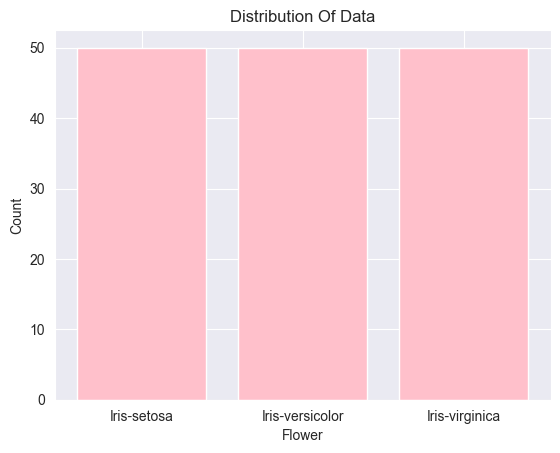

' By this we can understand that the flowers have an equal distribution. '

In [236]:
# Bar Graph
sns.set_style("darkgrid")

plt.bar(df[categorical[0]].value_counts().index,df[categorical[0]].value_counts(), color= "pink")
plt.title('Distribution Of Data')
plt.ylabel('Count')
plt.xlabel("Flower")
plt.show()

""" By this we can understand that the flowers have an equal distribution. """

# Exploity data analysis

In [164]:
import seaborn as sns

In [136]:
df[numerical[1:]].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [140]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

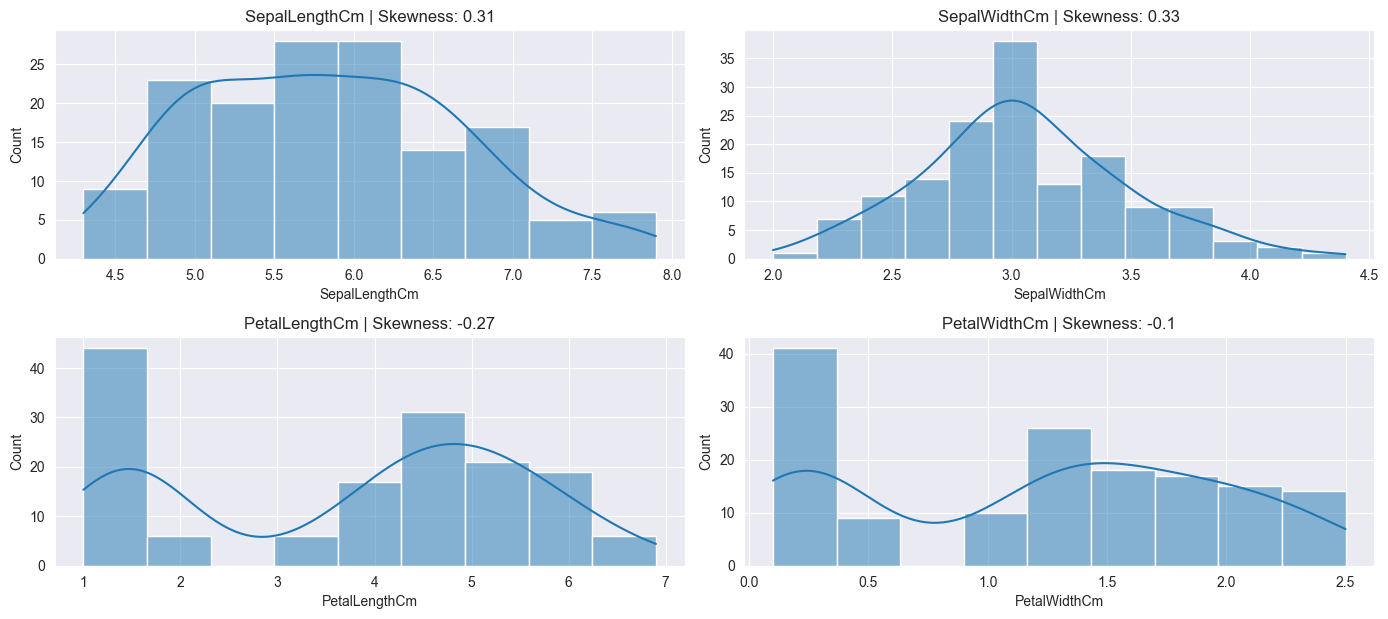

In [237]:
# Histogram

sns.set_style("darkgrid")

plt.figure(figsize =(14, len(numerical[1:])*3))
for idx, feature in enumerate(numerical[1:], 1):
    plt.subplot(len(numerical[1:]), 2, idx)
    sns.histplot(df[feature], kde = True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

In [ ]:
"""
Sepal Length:
    It is Slightly positively skewed.
    Most of the flowers have values between 5 and 6, with very few over 7.
    The distibution is almost a normal distribution.

Sepal Width:
    It is also slightly positively skewed.
    Most flowers are concentrated at the width 3.
    Few flowers have width greater than 4.

Petal Length:
    It is slightly negatively skewed.
    It has two peaks, one at 1 and other between 4 to 5, it is bimodal.
    There are no flowers with length between 2 to 3. The groups are clearly seperated suggesting higher correlation here(Iris-setosa).

Petal Width:
    It is very slightly negatively skewed.
    it is bimodal, it has two peaks, one between 0 and 0.5, and other at 1 and 1.5.
    There is clustering present between species.
"""

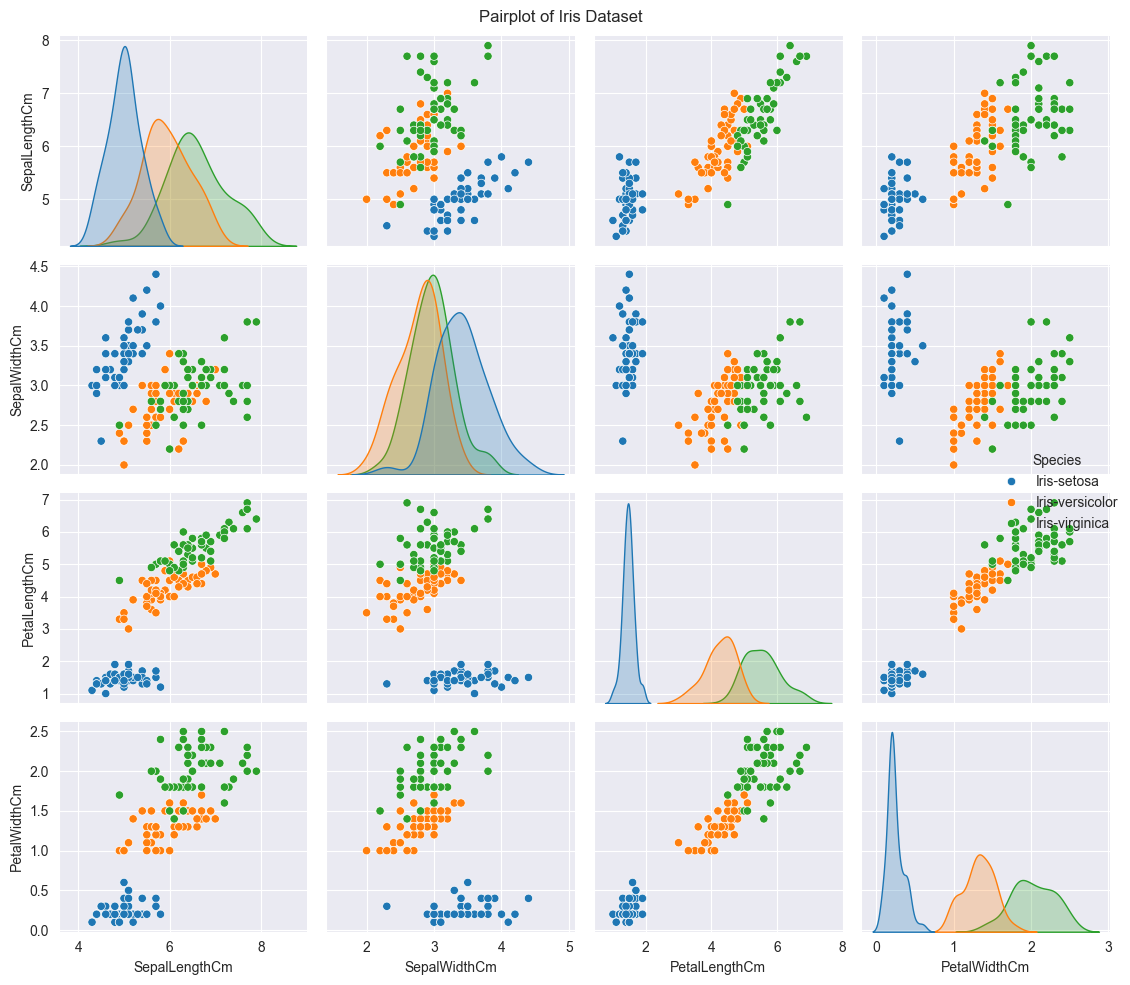

In [234]:
sns.pairplot(df, hue="Species")
plt.suptitle('Pairplot of Iris Dataset')
plt.tight_layout()
plt.show()

In [ ]:
"""
Diagnol Plot:
    1. Petal Length and Petal Width have the largest distinction between its species.
    2. Whereas Sepal Length and Sepal Width have the least distinction between its species, making them not beneficial for classification.

Inter-Feature Relationship:
    1. Petal Width and Petal Length have the most distinction between its species clustering.
    2. Sepal Width and Sepal Length have significant overlap for Iris-versicolor and Iris-virginica.
    3. Petal Width and Sepal Width have a bit of overlap but still distinguishable.

Species Clustering:
    1. From the above graphs we can intepret that there is corelation between the features of the Iris-setosa species.
       Therefore, a classification model will have a good time classifying the flowers of this species.
    2. Iris-versicolor and Iris-virginica have the most overlap especially due to Sepal Length and Sepal Width features, making them not beneficial for classification.

"""

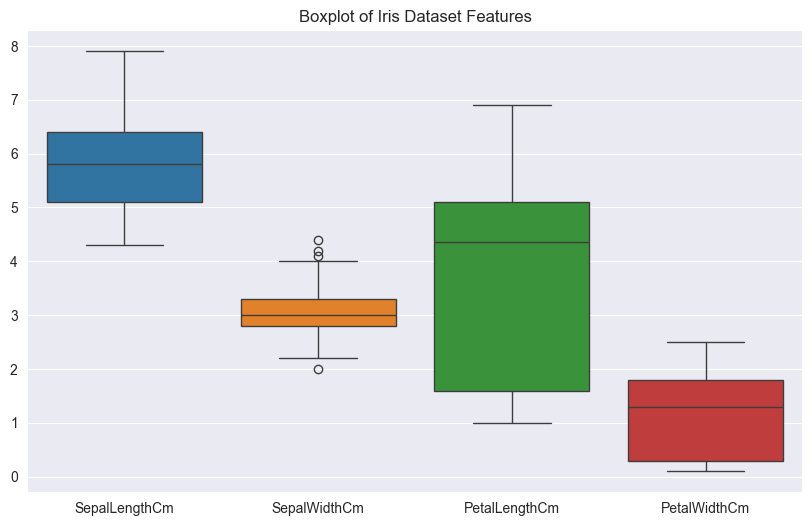

In [241]:
# BoxPlot

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical[1:]])
plt.title('Boxplot of Iris Dataset Features')
plt.show()

In [ ]:
"""
Sepal Length:
    The median is at the 5.8cm mark.
    IQR determines that the middle 50% is compact. No outliers.
    Whiskers show balanced distribution without much deviation.

Sepal Width:
    The median is around 3cm.
    IQR suggests smaller range of values.
    Whiskers show that outliers exist above 4cm mark and below 2cm mark suggesting that there are flowers with too big or two small of sepal width.

Petal Length:
    The median is at 4.5cm, and the distribution is downward skewed.
    IQR is large suggesting that the variability of the the values are high.
    Whiskers suggest that there is variability that helps in clustering of different data species.

Petal Width:
    The median is at 1.2cm and the distribution is slightly downward skewed.
    IQR is compact with no outliers.
    Whiskers suggest that this feature is also beneficial for classification.
"""

In [224]:
correlation_matrix = df[numerical[1:]].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


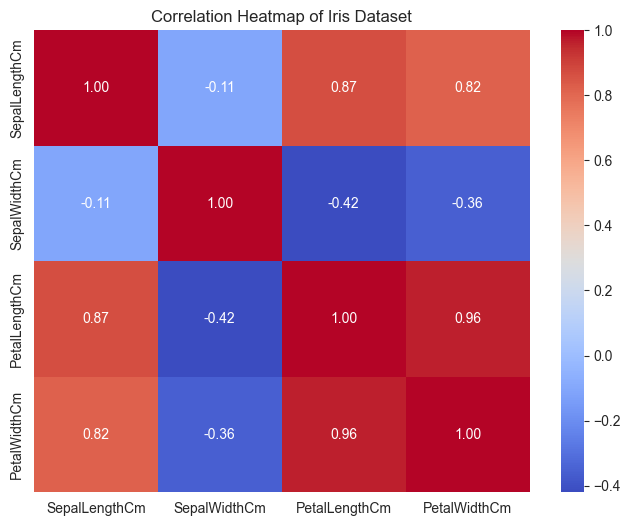

In [240]:
# Correlation between the features.

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

# Classification Model

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [293]:
X = df[numerical[1:]]
y = df[categorical[0]]

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [298]:
model = LogisticRegression(solver="lbfgs", random_state=42)

In [299]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [301]:
y_pred = model.predict(X_test)

In [304]:
accuracy_score(y_test, y_pred)

1.0